### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1829]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [1832]:
data = pd.read_csv('coupons.csv')

In [1834]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [1837]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [1839]:
# used the isnull() method to identify which columns have null data; since we know from the info provided by data.info(),
# see above, that there are 12,684 rows, we can decide whether we should drop a column altogether (if the percentage 
# of null data is very high) or assign the null data in a column to a reasonable value from the available list
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [1841]:
# since the percentage of null values for column "car" is very high (>99%), we can remove this column 
# from the dataframe; check that it does not appear in data.info()
data.drop(columns = "car", axis = 1, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [1843]:
# the rest of the columns seem to have a relatively small percentage of null values (<2%); to identify the 
# unique elements of each column having null elements, first store the series with the zero and nonzero 
# (znz) null counts to series_znz, then store the list of columns with null elements to list_null, and then 
# print the unique elements of all those columns

series_znz = data.isnull().sum()
list_null = series_znz.iloc[series_znz.to_numpy().nonzero()].index
type(list_null)
for i in range(0,len(list_null)):
    print(list_null[i], data[list_null[i]].unique())

Bar ['never' 'less1' '1~3' 'gt8' nan '4~8']
CoffeeHouse ['never' 'less1' '4~8' '1~3' 'gt8' nan]
CarryAway [nan '4~8' '1~3' 'gt8' 'less1' 'never']
RestaurantLessThan20 ['4~8' '1~3' 'less1' 'gt8' nan 'never']
Restaurant20To50 ['1~3' 'less1' 'never' 'gt8' '4~8' nan]


In [1845]:
# finally, given the importance of column Y in the project, renamed this column to a more appropriate name
# similarly, renamed "passanger" to "passenger" to not carry the typo for the rest of this analysis
data = data.rename(columns={"Y": "AcceptedCoupon" })
data = data.rename(columns={"passanger": "passenger" })

3. Decide what to do about your missing data -- drop, replace, other...

In [1848]:
# Based on the unique values per column having null values right above (Question 2.), it looks reasonable 
# to set all the null (nan) values to 'never' for all those columns

for i in range(0,len(list_null)):
    data[list_null[i]] = data[[list_null[i]]].fillna("never")
    
# we can check that none of those columns have null elements anymore
for i in range(0,len(list_null)):
    print(data[[list_null[i]]].isnull().sum())

Bar    0
dtype: int64
CoffeeHouse    0
dtype: int64
CarryAway    0
dtype: int64
RestaurantLessThan20    0
dtype: int64
Restaurant20To50    0
dtype: int64


4. What proportion of the total observations chose to accept the coupon? 

In [1851]:
# divide observations with accepted coupon (AcceptedCoupon=1) by the total number of observations
prop_accept_percent = len(data[ data["AcceptedCoupon"] == 1 ]) / len(data) * 100
print('The proportion of the total observations that chose to accept the coupon is', "%.2f" % prop_accept_percent, '%')

The proportion of the total observations that chose to accept the coupon is 56.84 %


5. Use a bar plot to visualize the `coupon` column.

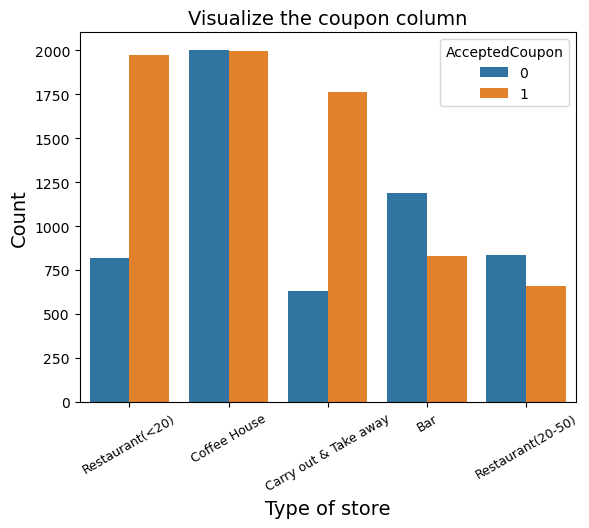

There is significant sensitivity to whether a coupon is accepted only for cheap restaurants (< $20) and 'Carry out & Take away' stores


In [1854]:
fig_coupon = sns.countplot(data, x = "coupon", hue = "AcceptedCoupon")
fig_coupon.axes.set_title("Visualize the coupon column",fontsize = 14)
fig_coupon.set_xlabel("Type of store", fontsize = 14)
fig_coupon.set_ylabel("Count", fontsize = 14)
fig_coupon.set_xticklabels(fig_coupon.get_xticklabels(), rotation = 30, size = 9)
plt.show()

print("There is significant sensitivity to whether a coupon is accepted only for cheap restaurants (< $20) and 'Carry out & Take away' stores")

6. Use a histogram to visualize the temperature column.

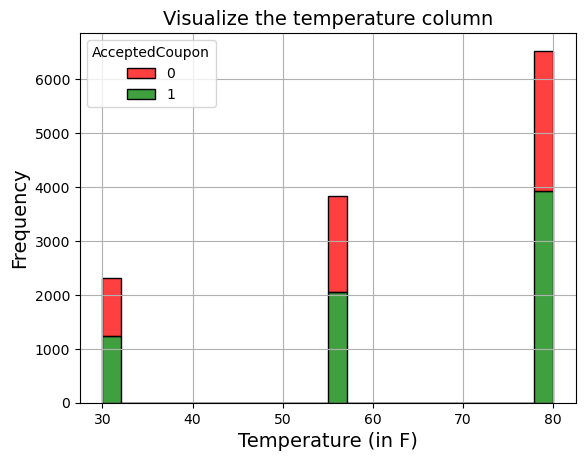

The coupon is clearly accepted at higher rate when the temperature is high (at 80 degrees)


In [1857]:
sns.histplot(data = data, x = "temperature", hue = "AcceptedCoupon", multiple = "stack", palette=['red', 'green'], legend="full")
plt.title('Visualize the temperature column', fontsize = 14)
plt.xlabel('Temperature (in F)', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.grid(True)
plt.show()

print("The coupon is clearly accepted at higher rate when the temperature is high (at 80 degrees)")

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [1859]:
data_bar = data.query('coupon == "Bar"')

# check the first/last few rows of the coupon column to verify that only the Bar coupons are kept
data_bar["coupon"].head(10), data_bar["coupon"].tail(10)

(9     Bar
 13    Bar
 17    Bar
 24    Bar
 35    Bar
 39    Bar
 46    Bar
 57    Bar
 61    Bar
 75    Bar
 Name: coupon, dtype: object,
 12643    Bar
 12644    Bar
 12647    Bar
 12652    Bar
 12660    Bar
 12663    Bar
 12664    Bar
 12667    Bar
 12670    Bar
 12682    Bar
 Name: coupon, dtype: object)

2. What proportion of bar coupons were accepted?


In [1863]:
# calculate the ratio of accepted coupons (AcceptedCoupon column equal to 1) to the total size of the df
# could also use <df>.shape[0] method instead of len()

prop_bar_accept_percent = len(data_bar[ data_bar["AcceptedCoupon"] == 1 ]) / len(data_bar) * 100
print('The proportion of bar coupons that were accepted is', "%.2f" % prop_bar_accept_percent, '%')

The proportion of bar coupons that were accepted is 41.00 %


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [1865]:
# by looking at the output of the value_counts() method, we can see that the first 3 elements
# contain the categories of those who went to a bear 3 or fewer time; the remaining
# elements contain the rest of the categories
count_3_or_fewer_acc = data_bar.query('AcceptedCoupon == 1').Bar.value_counts()[:3].sum()
count_3_or_fewer_tot = data_bar.Bar.value_counts()[:3].sum()
result_1 = count_3_or_fewer_acc / count_3_or_fewer_tot * 100
count_more_than_3_acc = data_bar.query('AcceptedCoupon == 1').Bar.value_counts()[3:5].sum()
count_more_than_3_tot = data_bar.Bar.value_counts()[3:5].sum()
result_2 = count_more_than_3_acc / count_more_than_3_tot * 100

print('The proportion of those who went to a bar 3 or fewer times is', "%.2f" % result_1, '%')
print('The proportion of those who went to a bar more than 3 times is', "%.2f" % result_2, '%')

The proportion of those who went to a bar 3 or fewer times is 37.07 %
The proportion of those who went to a bar more than 3 times is 76.88 %


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?

In [1869]:
# first, define the dataframe containing the required columns 'Bar' and 'age' when the bar coupon is accepted
df_bar_q4 = data_bar.query('AcceptedCoupon == 1')[["Bar","age"]]

# calculate the coupon acceptance rates for the following four cases of drivers who go to a bar:
# Cat 1. go to a bar more than once a month and are over the age of 25
# Cat 2. go to a bar more than once a month and are below the age of 25
# Cat 3. go to a bar less than once a month and are over the age of 25
# Cat 4. go to a bar less than once a month and are below the age of 25
Num_cases = 4

# list of categories that will be used to calculate the acceptance rates
# (use df_bar_q4.Bar.unique() and df_bar_q4.age.unique() for the full list of categories)
array_bar_morethanonce = pd.array(['1~3', 'gt8', '4~8'], dtype="string")
array_bar_lessthanonce = pd.array(['never', 'less1'], dtype="string")
array_age_ge25 = pd.array(['46', '26', '31', '50plus', '41', '36'], dtype="string")
array_age_lt25 = pd.array(['21', 'below21'], dtype="string")

# initialize vector containing the number of elements per case
len_vec = np.zeros(Num_cases, dtype=int)

for i in range(Num_cases):    
    match i:
        case 0:
            array_bar_curr = array_bar_morethanonce;
            array_age_curr = array_age_ge25;
        case 1:
            array_bar_curr = array_bar_morethanonce;
            array_age_curr = array_age_lt25;
        case 2:
            array_bar_curr = array_bar_lessthanonce;
            array_age_curr = array_age_ge25;
        case 3:
            array_bar_curr = array_bar_lessthanonce;
            array_age_curr = array_age_lt25;
        case _: 
            print("There is an error!")    
    array_bar_curr
    for j in range(len(array_bar_curr)):
        for k in range(len(array_age_curr)):
            len_vec[i] += len(df_bar_q4.loc[(df_bar_q4["Bar"] == array_bar_curr[j])].loc[ df_bar_q4["age"] == array_age_curr[k]])

res_cat_q4 = len_vec / len(df_bar_q4) * 100
print('The acceptance rate for those who go to a bar more than once a month and are over the age of 25 is', "%.2f" % res_cat_q4[0], '%')
print('The acceptance rate for those who go to a bar more than once a month and are below the age of 25 is', "%.2f" % res_cat_q4[1], '%')
print('The acceptance rate for those who go to a bar less than once a month and are over the age of 25 is', "%.2f" % res_cat_q4[2], '%')
print('The acceptance rate for those who go to a bar less than once a month and are below the age of 25 is', "%.2f" % res_cat_q4[3], '%')
print('The acceptance rates are higher for those drivers who are over the age of 25 independently from the frequency they visit a bar')

The acceptance rate for those who go to a bar more than once a month and are over the age of 25 is 35.31 %
The acceptance rate for those who go to a bar more than once a month and are below the age of 25 is 14.27 %
The acceptance rate for those who go to a bar less than once a month and are over the age of 25 is 34.82 %
The acceptance rate for those who go to a bar less than once a month and are below the age of 25 is 15.60 %
The acceptance rates are higher for those drivers who are over the age of 25 independently from the frequency they visit a bar


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 

In [1872]:
# first, define the dataframe containing the required columns 'Bar', 'passanger', and 'occupation' when the bar coupon is accepted
df_bar_q5 = data_bar.query('AcceptedCoupon == 1')[["Bar","passenger","occupation"]]

# list of categories that will be used to calculate the acceptance rates
# (use df_bar_q5.Bar.unique(), df_bar_q5.passenger.unique(), and df_bar_q5.occupation.unique() 
# for the full list of categories)
array_bar_morethanonce = pd.array(['1~3', 'gt8', '4~8'], dtype="string")
array_passenger_kid = 'Kid(s)'
array_passenger_notakid = pd.array(['Alone', 'Friend(s)', 'Partner'], dtype="string")
array_occupation_otherthanfff = np.setdiff1d(df_bar_q5.occupation.unique(),'Farming Fishing & Forestry')

# calculate the acceptance rate for drivers who do not have a kid passenger in the car
# and for drivers who have kid passengers in the car (for occupation other than Farming, Fishing, & Forestry
# in both cases)

len_q5a = 0
for i in range(len(array_bar_morethanonce)):   
    for j in range(len(array_passenger_notakid)):
        for k in range(len(array_occupation_otherthanfff)):
            len_q5a += len( df_bar_q5.loc[(df_bar_q5["Bar"] == array_bar_morethanonce[i])].loc[ df_bar_q5["passenger"] == array_passenger_notakid[j] ].loc[ df_bar_q5["occupation"] == array_occupation_otherthanfff[k] ] )    

len_q5b = 0
for i in range(len(array_bar_morethanonce)):   
    for j in range(len(array_passenger_kid)):
        for k in range(len(array_occupation_otherthanfff)):
            len_q5b += len( df_bar_q5.loc[(df_bar_q5["Bar"] == array_bar_morethanonce[i])].loc[ df_bar_q5["passenger"] == array_passenger_kid[j] ].loc[ df_bar_q5["occupation"] == array_occupation_otherthanfff[k] ] )    

res_q5a = len_q5a / len(df_bar_q5) * 100
res_q5b = len_q5b / len(df_bar_q5) * 100
print('The acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry is', "%.2f" % res_q5a, '%')
print('The acceptance rate between drivers who go to bars more than once a month and had kid passengers and had occupations in farming, fishing, or forestry category is', "%.2f" % res_q5b, '%')
print('It is positive to notice that there was no coupon acceptance in the presence of kid passengers!')

The acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry is 47.52 %
The acceptance rate between drivers who go to bars more than once a month and had kid passengers and had occupations in farming, fishing, or forestry category is 0.00 %
It is positive to notice that there was no coupon acceptance in the presence of kid passengers!


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 

In [1874]:
# first, define the dataframe containing the required columns 'Bar', 'passanger', 'maritalStatus', 'age', 'RestaurantLessThan20', and 'income' when the bar coupon is accepted
df_bar_q6 = data_bar.query('AcceptedCoupon == 1')[["Bar","passenger","maritalStatus","age","RestaurantLessThan20","income"]]

# list of categories that will be used to calculate the acceptance rates
# (use df_bar_q6.Bar.unique(), df_bar_q6.passenger.unique(), df_bar_q6.maritalStatus.unique() 
# df_bar_q6.age.unique(), df_bar_q6.RestaurantLessThan20.unique(), df_bar_q6.income.unique()
# for the full list of categories)
array_bar_morethanonce = pd.array(['1~3', 'gt8', '4~8'], dtype="string")
array_passanger_notakid = pd.array(['Alone', 'Friend(s)', 'Partner'], dtype="string")
array_maritalStatus_notwidowed = np.setdiff1d(df_bar_accept_q6.maritalStatus.unique(),'Widowed')
array_age_lessthan30 = pd.array(['21', '26', 'below21'], dtype="string")
array_cheaprest_morethan4x = pd.array(['4~8', 'gt8'], dtype="string")
array_income_lessthan50K = pd.array(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'], dtype="string")

# each of the OR conditions is assigned a different counter, i.e., 
# len_q6a, len_q6b, and len_q6c, respectively

len_q6a = 0
for i in range(len(array_bar_morethanonce)):   
    for j in range(len(array_passanger_notakid)):
        for k in range(len(array_maritalStatus_notwidowed)):
            len_q6a += len( df_bar_accept_q6.loc[(df_bar_accept_q6["Bar"] == array_bar_morethanonce[i])].loc[ df_bar_accept_q6["passanger"] == array_passanger_notakid[j] ].loc[ df_bar_accept_q6["maritalStatus"] == array_maritalStatus_notwidowed[k] ] )    

len_q6b = 0
for i in range(len(array_bar_morethanonce)):   
    for j in range(len(array_passanger_notakid)):
        len_q6b += len( df_bar_accept_q6.loc[(df_bar_accept_q6["Bar"] == array_bar_morethanonce[i])].loc[ df_bar_accept_q6["age"] == array_age_lessthan30[j] ] )    

len_q6c = 0
for i in range(len(array_cheaprest_morethan4x)):   
    for j in range(len(array_income_lessthan50K)):
        len_q6c += len( df_bar_accept_q6.loc[(df_bar_accept_q6["RestaurantLessThan20"] == array_cheaprest_morethan4x[i])].loc[ df_bar_accept_q6["income"] == array_income_lessthan50K[j] ] )

res_q6a = len_q6a / len(df_bar_q6) * 100
res_q6b = len_q6b / len(df_bar_q6) * 100
res_q6c = len_q6c / len(df_bar_q6) * 100

print('The acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed is', "%.2f" % res_q6a, '%')
print('The acceptance rate for drivers who go to bars more than once a month and are under the age of 30 is', "%.2f" % res_q6b, '%')
print('The acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K is', "%.2f" % res_q6c, '%')

The acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed is 47.52 %
The acceptance rate for drivers who go to bars more than once a month and are under the age of 30 is 30.11 %
The acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K is 18.86 %


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [1876]:
print('Based on the analysis of the data, I would hypothesize that drivers who accepted the bar coupons are likely to be over the age of 25, go to a bar more than once a month, and do not have kid passengers in the car.')

Based on the analysis of the data, I would hypothesize that drivers who accepted the bar coupons are likely to be over the age of 25, go to a bar more than once a month, and do not have kid passengers in the car.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [1881]:
# When the coupon column was visualized in the previous analysis, it seems that 
# the Coffee House coupons are the most popular with very similar acceptance rates. It
# would be interesting to investigate deeper the characteristics of passengers who
# received Coffee House coupons.

In [1882]:
# we first assign a new dataframe for the passengers who received Coffee House Coupons
data_coffee = data.query('coupon == "Coffee House"')
data_coffee.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,AcceptedCoupon
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,0,0,0,1,0


In [1885]:
# After analyzing the different columns of the dataframe for the passengers who received 
# Coffee House Coupons against their acceptance, there have been rather clear sensitivities
# identified for the following columns (for most of the other columns, no significant
# sensitivities to the different categories were identified):
# 1. passenger 
# 2. time
# 3. age
# 4. expiration
# 5. income

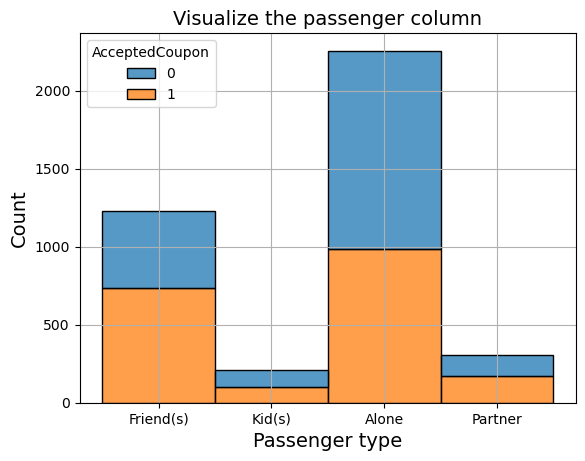

In [1886]:
# 1. passenger column: Drivers are more likely to accept the coupon when they have 
# friend passengers and less likely to accept when they are alone
sns.histplot(data = data_coffee, x = "passenger", hue = "AcceptedCoupon", multiple = "stack")
plt.title('Visualize the passenger column', fontsize = 14)
plt.xlabel('Passenger type', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.grid(True)
plt.show()

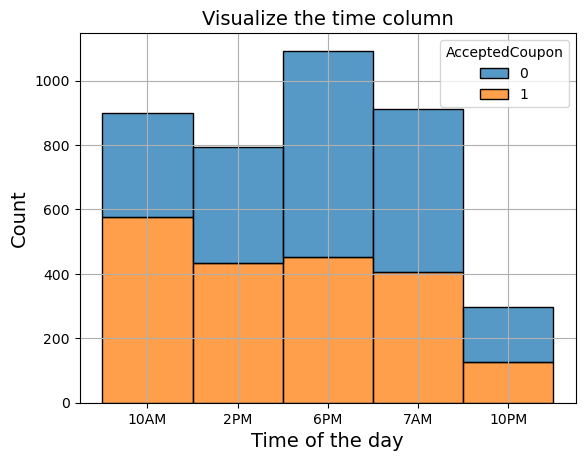

In [1888]:
# 2. time column: Drivers are more likely to accept the coupon at 10 am and 2 pm
# than earlier or later times in the day
sns.histplot(data = data_coffee, x = "time", hue = "AcceptedCoupon", multiple = "stack")
plt.title('Visualize the time column', fontsize = 14)
plt.xlabel('Time of the day', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.grid(True)
plt.show()

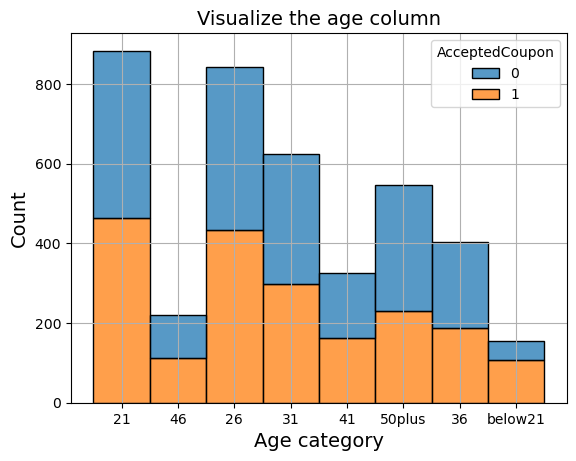

In [1890]:
# 3. age column: Only drivers of age below 21 years show are significantly more likely 
# to accept the coupon than any other age
sns.histplot(data = data_coffee, x = "age", hue = "AcceptedCoupon", multiple = "stack")
plt.title('Visualize the age column', fontsize = 14)
plt.xlabel('Age category', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.grid(True)
plt.show()

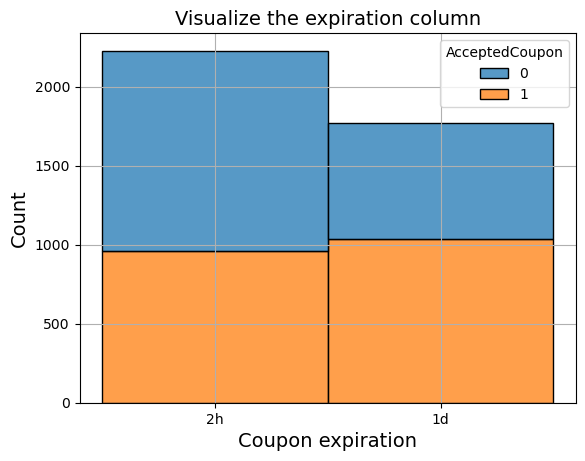

In [1892]:
# 4. expiration column: Drivers are more likely to accept the coupon when it has longer
# expiration time (1 day vs. 2 hours)
sns.histplot(data = data_coffee, x = "expiration", hue = "AcceptedCoupon", multiple = "stack")
plt.title('Visualize the expiration column', fontsize = 14)
plt.xlabel('Coupon expiration', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.grid(True)
plt.show()

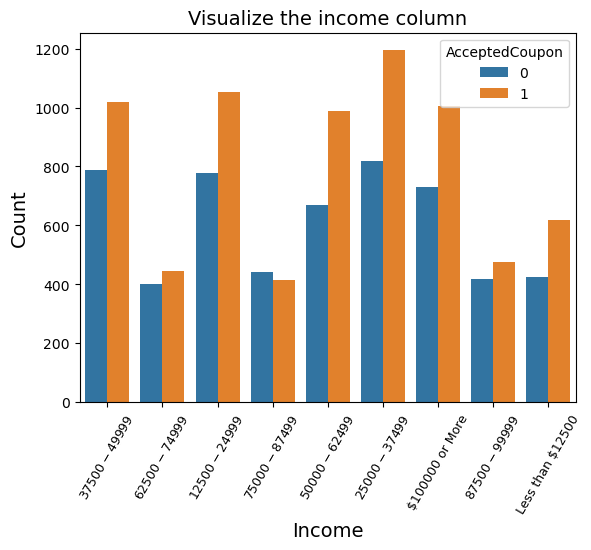

In [1895]:
# 5. income column: Drivers are more likely to accept the coupon when their income is
# less than 62.5K or higher than 100K
fig_income = sns.countplot(data, x = "income", hue = "AcceptedCoupon")
fig_income.axes.set_title("Visualize the income column",fontsize = 14)
fig_income.set_xlabel("Income", fontsize = 14)
fig_income.set_ylabel("Count", fontsize = 14)
fig_income.set_xticklabels(fig_income.get_xticklabels(), rotation =60, size = 9)
plt.show()

In [1897]:
print('From analyzing the data for the Coffee House coupons, the following main observations can be made:')
print('1. Drivers are more likely to accept the coupon when they have friend passengers and less likely to accept when they are alone.')
print('2. Drivers are more likely to accept the coupon at 10 am and 2 pm than earlier or later times in the day.')
print('3. Only drivers of age below 21 years show are significantly more likely to accept the coupon than any other age.')
print('4. Drivers are more likely to accept the coupon when it has longer expiration time (1 day vs. 2 hours).')
print('5. Drivers are more likely to accept the coupon when their income is less than 62.5K or higher than 100K.')

From analyzing the data for the Coffee House coupons, the following main observations can be made:
1. Drivers are more likely to accept the coupon when they have friend passengers and less likely to accept when they are alone.
2. Drivers are more likely to accept the coupon at 10 am and 2 pm than earlier or later times in the day.
3. Only drivers of age below 21 years show are significantly more likely to accept the coupon than any other age.
4. Drivers are more likely to accept the coupon when it has longer expiration time (1 day vs. 2 hours).
5. Drivers are more likely to accept the coupon when their income is less than 62.5K or higher than 100K.
